In [41]:
import nilearn.plotting as plotting
from decouple import config
import matplotlib.pyplot as plt
import numpy as np
import os
import second_level_functions as slf
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning) #Filterout all the nilearn user warnings

Change name of task here then run

In [42]:
task = 'fear'

Define paths, get images and define negative log10 threshold value

In [43]:
threshold_pval = -np.log10(0.05)
path = os.path.join(config(task), '2ndlevel', 'mixed_model')
save_results = os.path.join(config(task), '2ndlevel')
images = slf.get_images(path)
contrasts = slf.contrast_imgs(images['t_stat'], images['pvals'])

Plotting pvalues

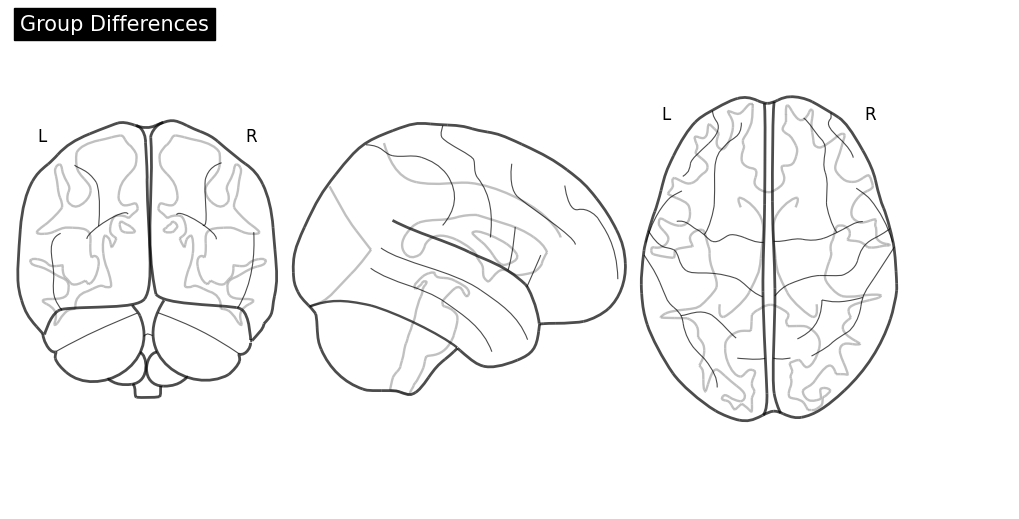

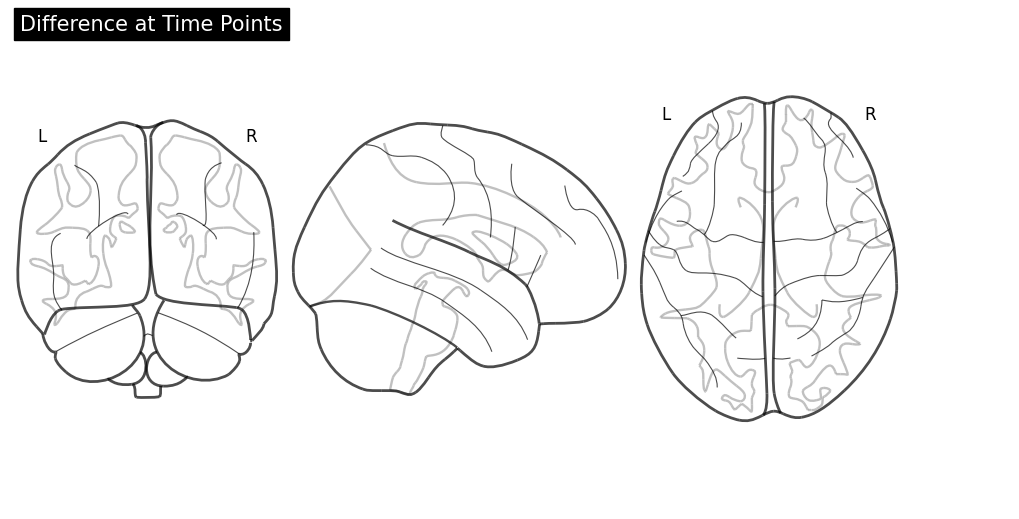

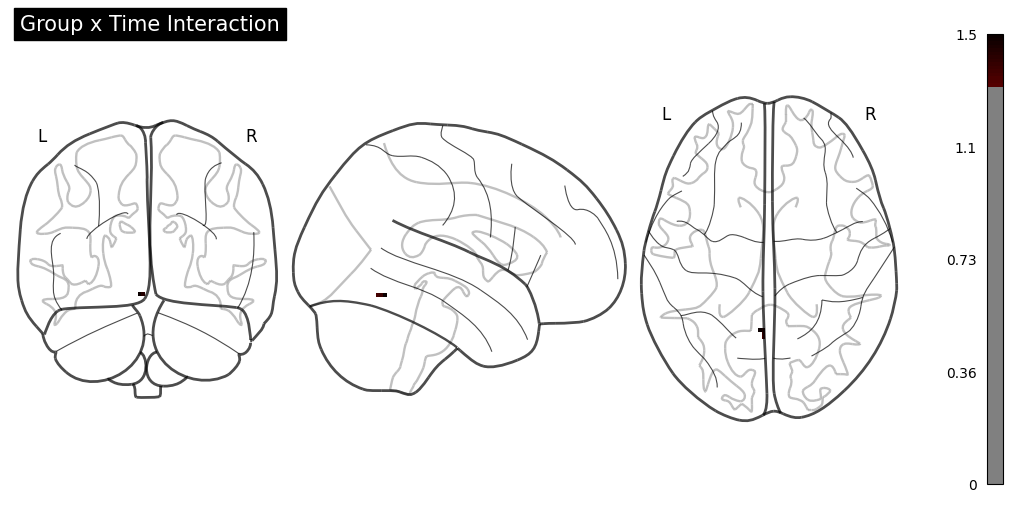

In [44]:
contrasts_list = [contrasts['group'], contrasts['time'], contrasts['interaction']]

for contrast in contrasts_list:
    fig = plt.figure(figsize=(10, 5))
    plotting.plot_glass_brain(contrast['pvals'], colorbar=True, plot_abs=False, 
                              figure=fig, title=contrast['graph_title'], threshold=threshold_pval)


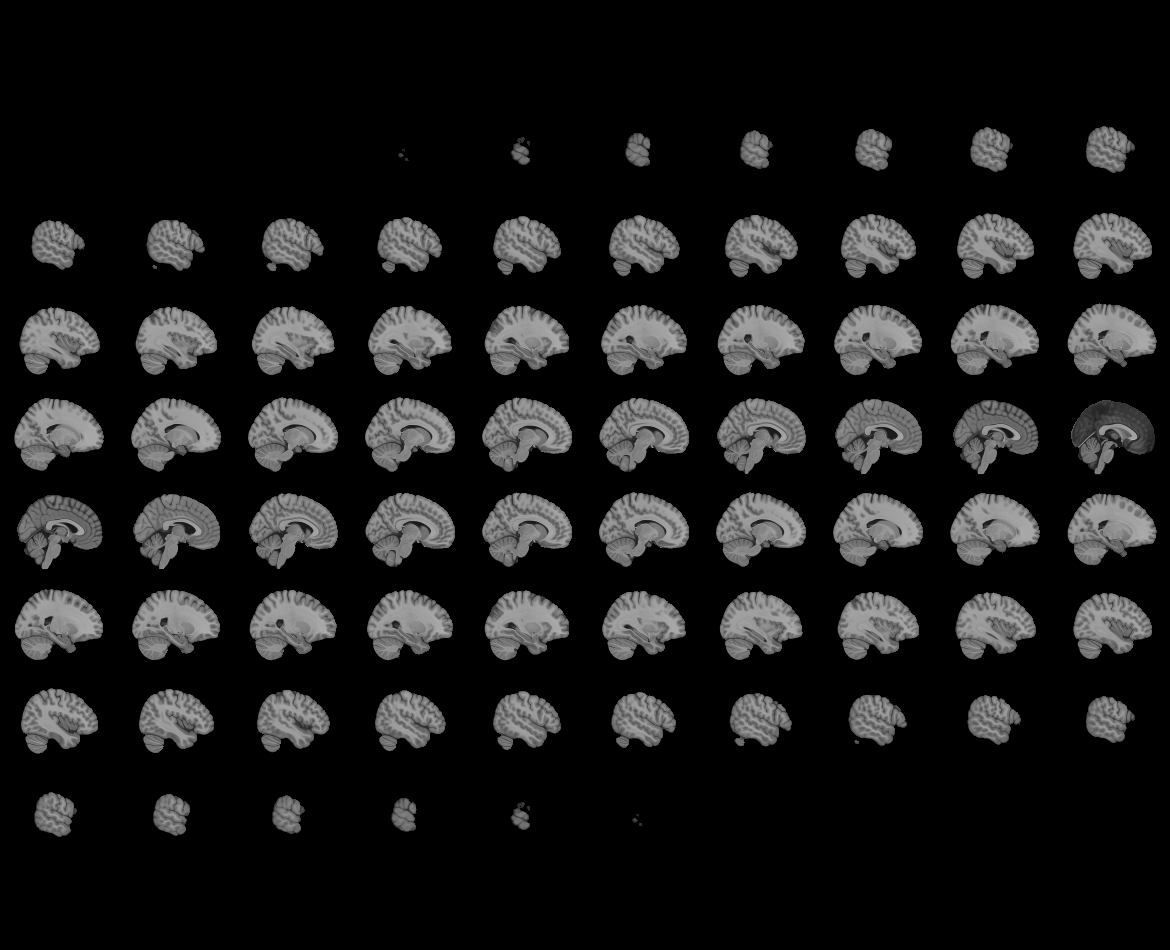
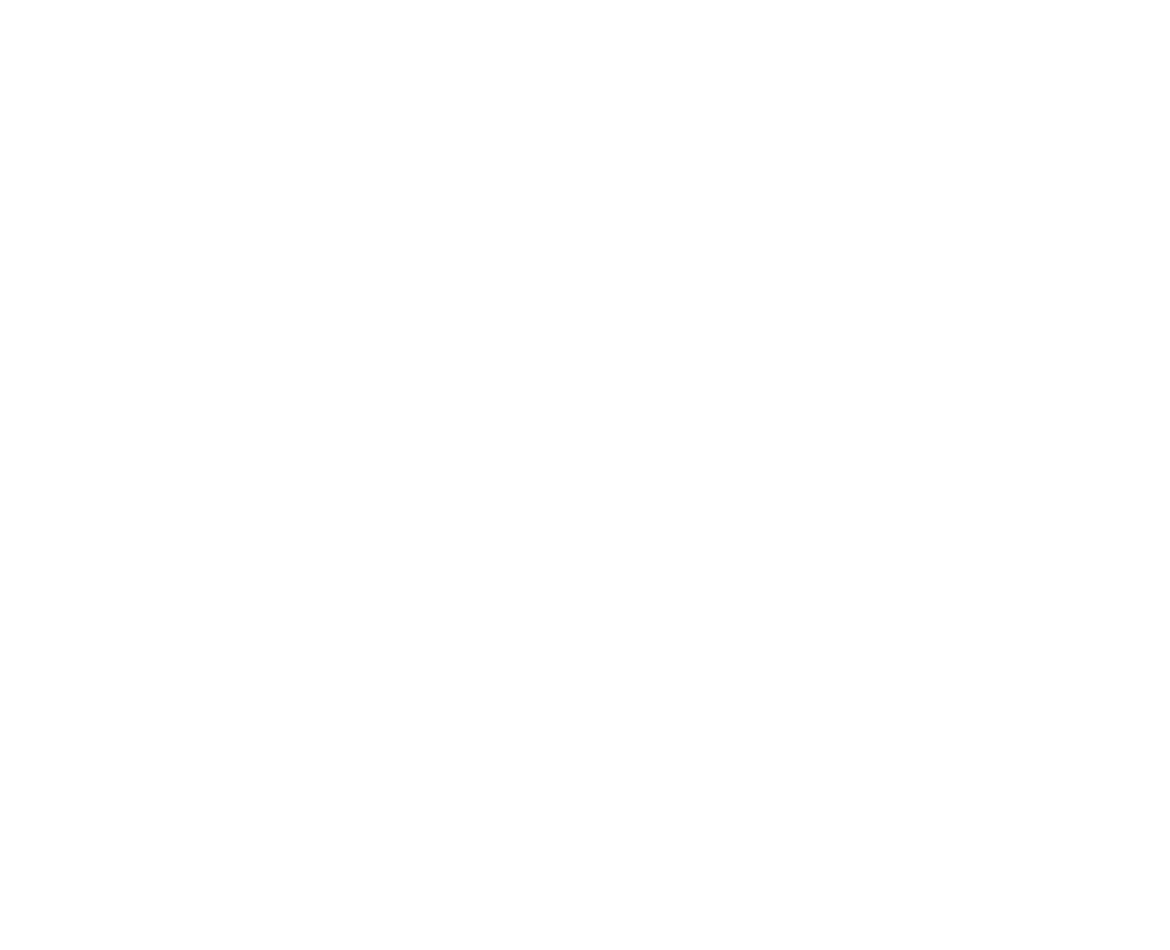

In [45]:
plotting.view_img(contrasts['group']['pvals'], threshold=threshold_pval)


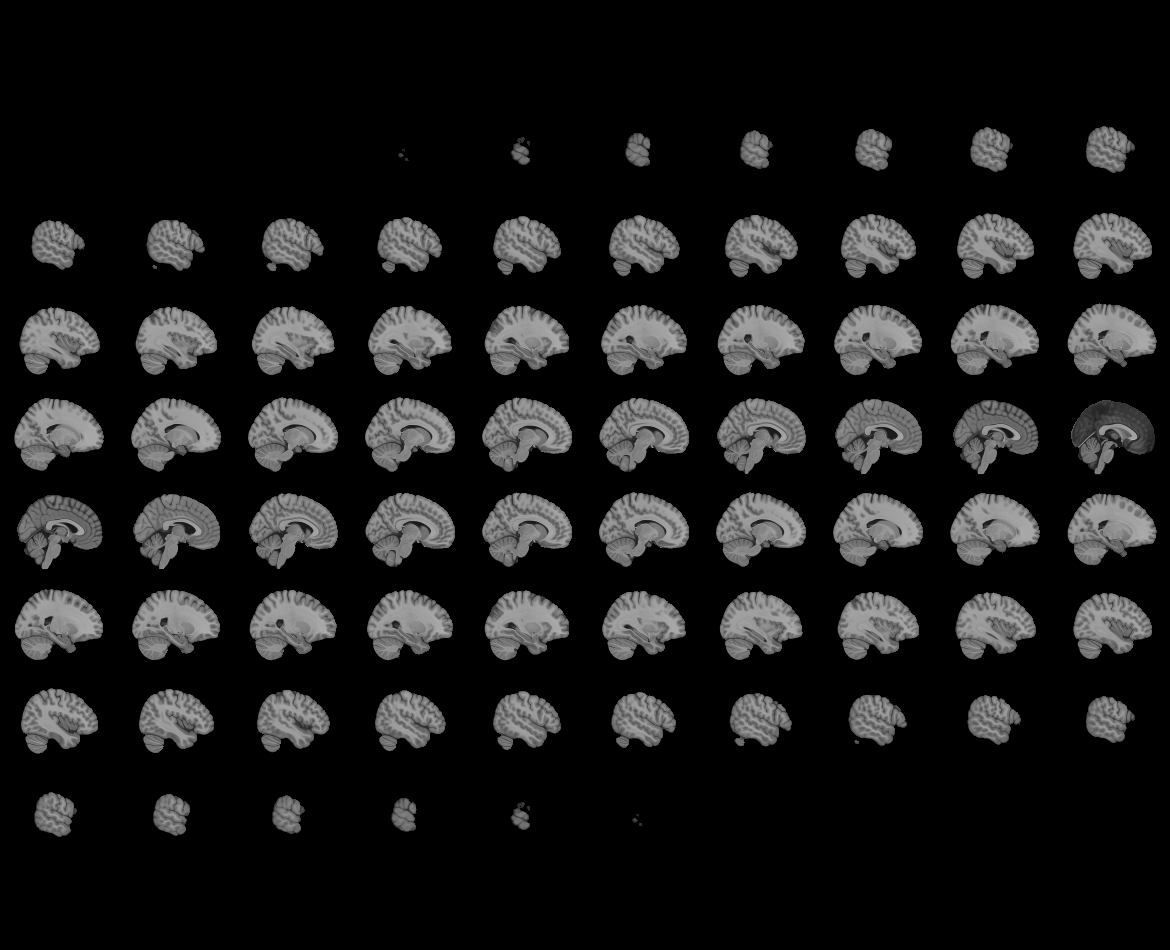
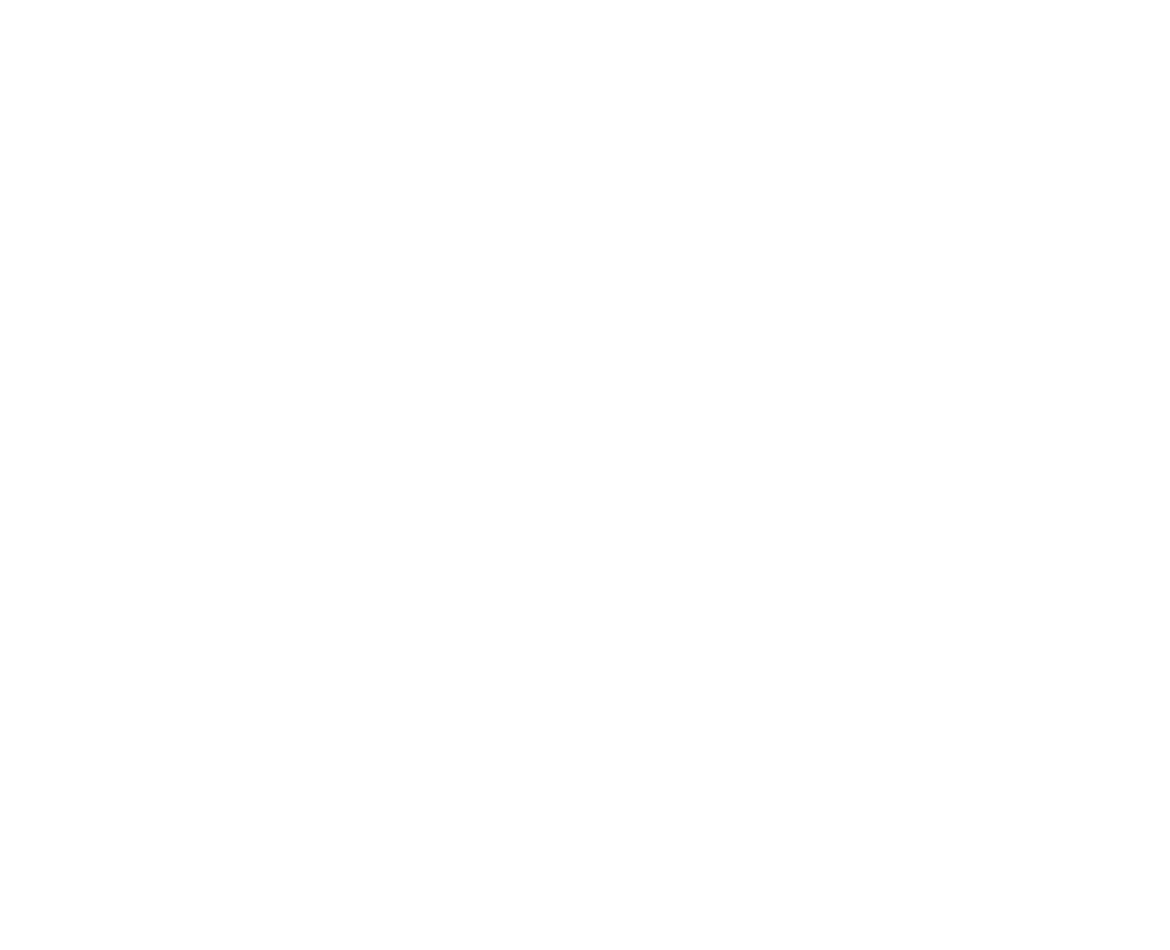

In [46]:
plotting.view_img(contrasts['time']['pvals'], threshold=threshold_pval)


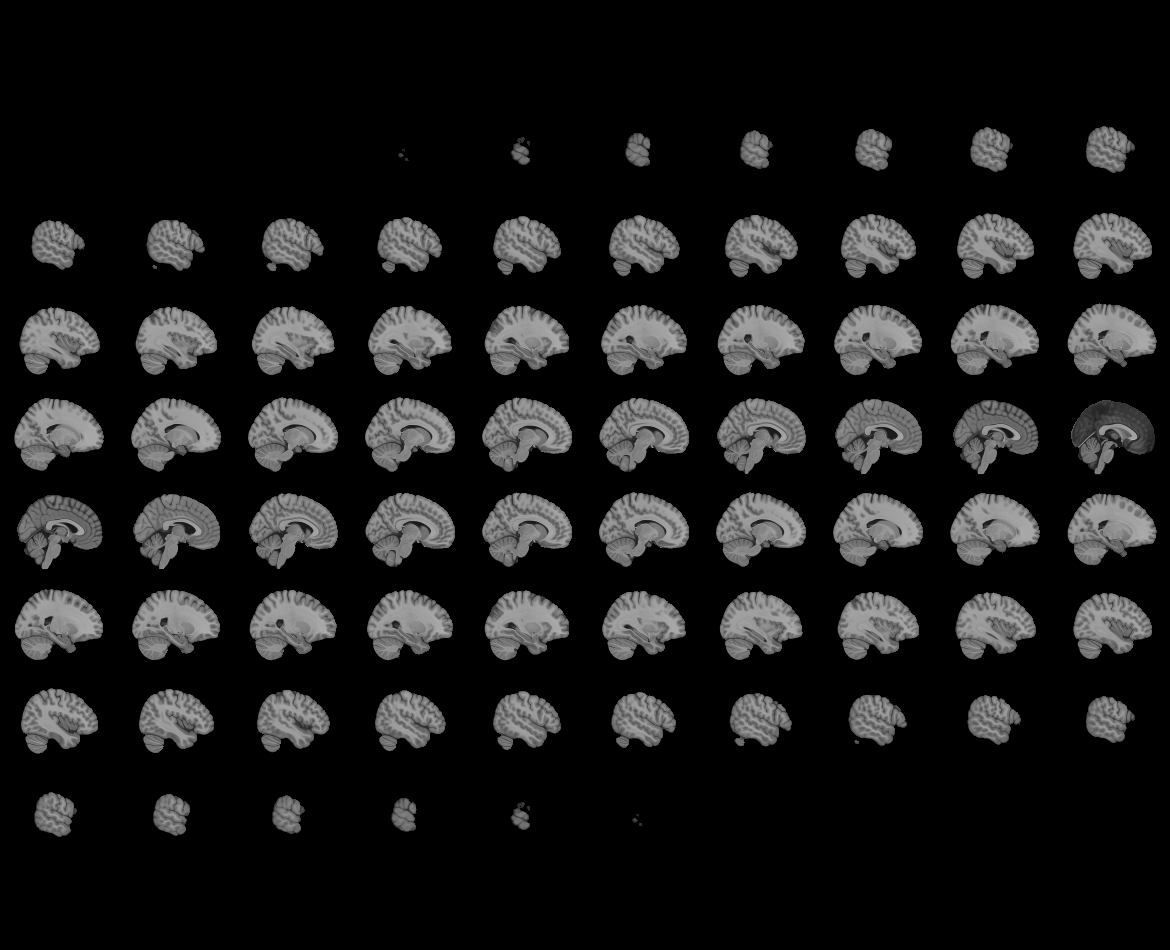
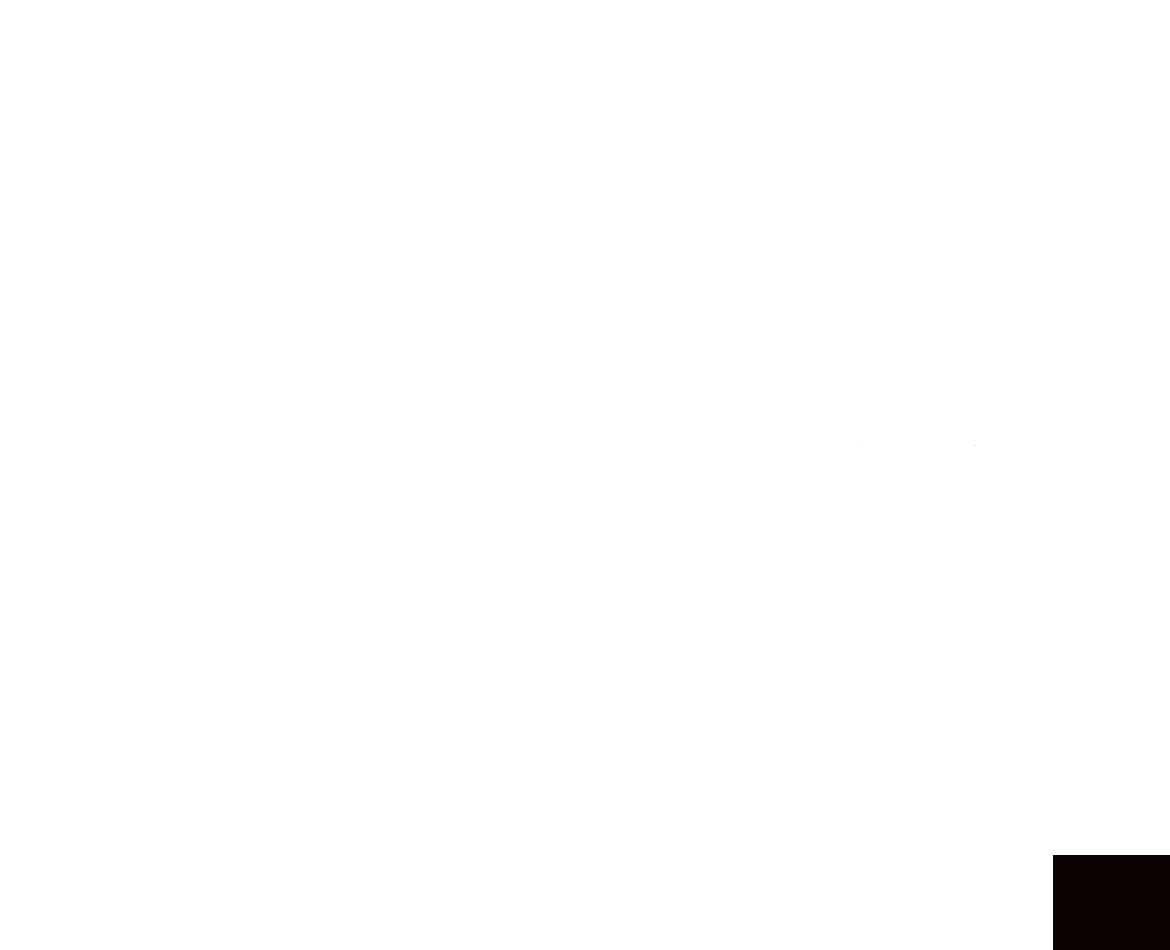

In [47]:
plotting.view_img(contrasts['interaction']['pvals'], threshold=threshold_pval)


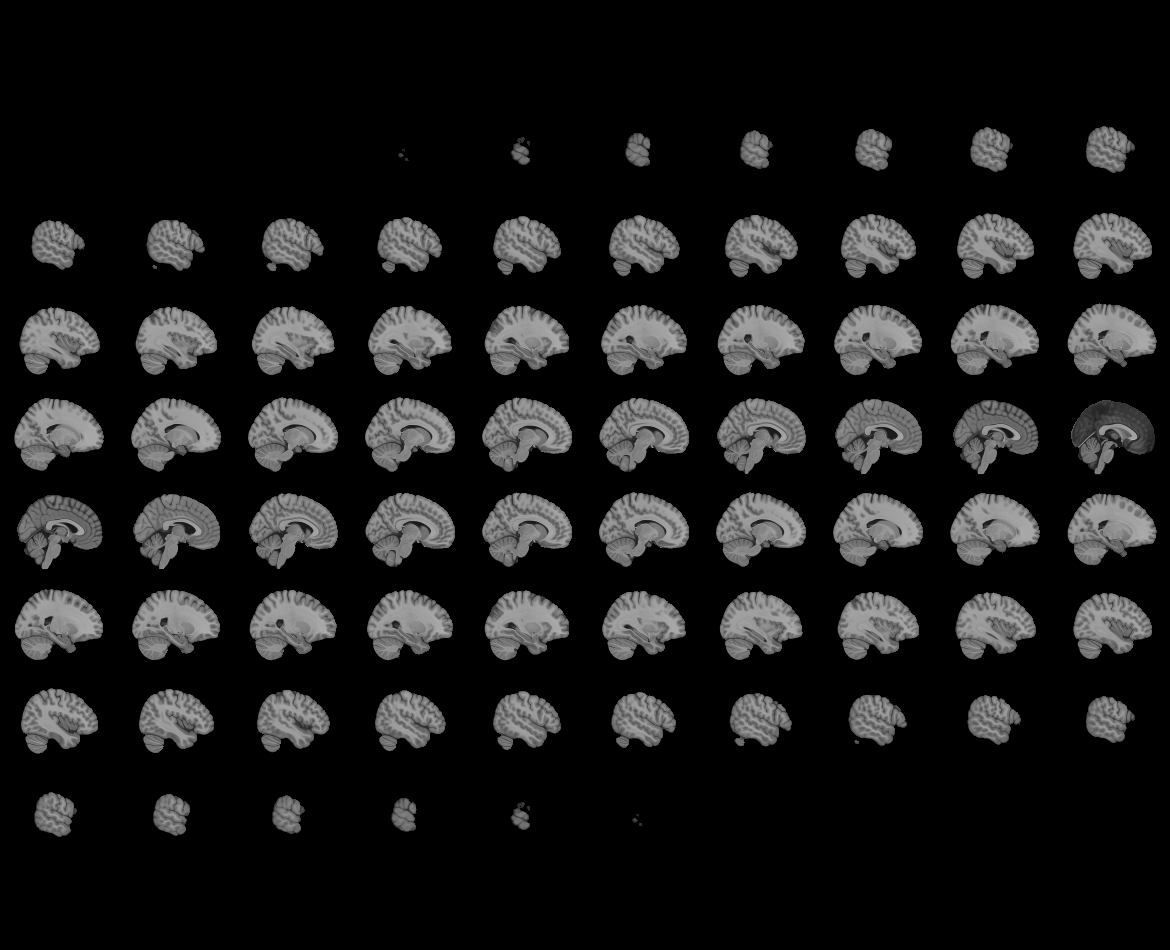
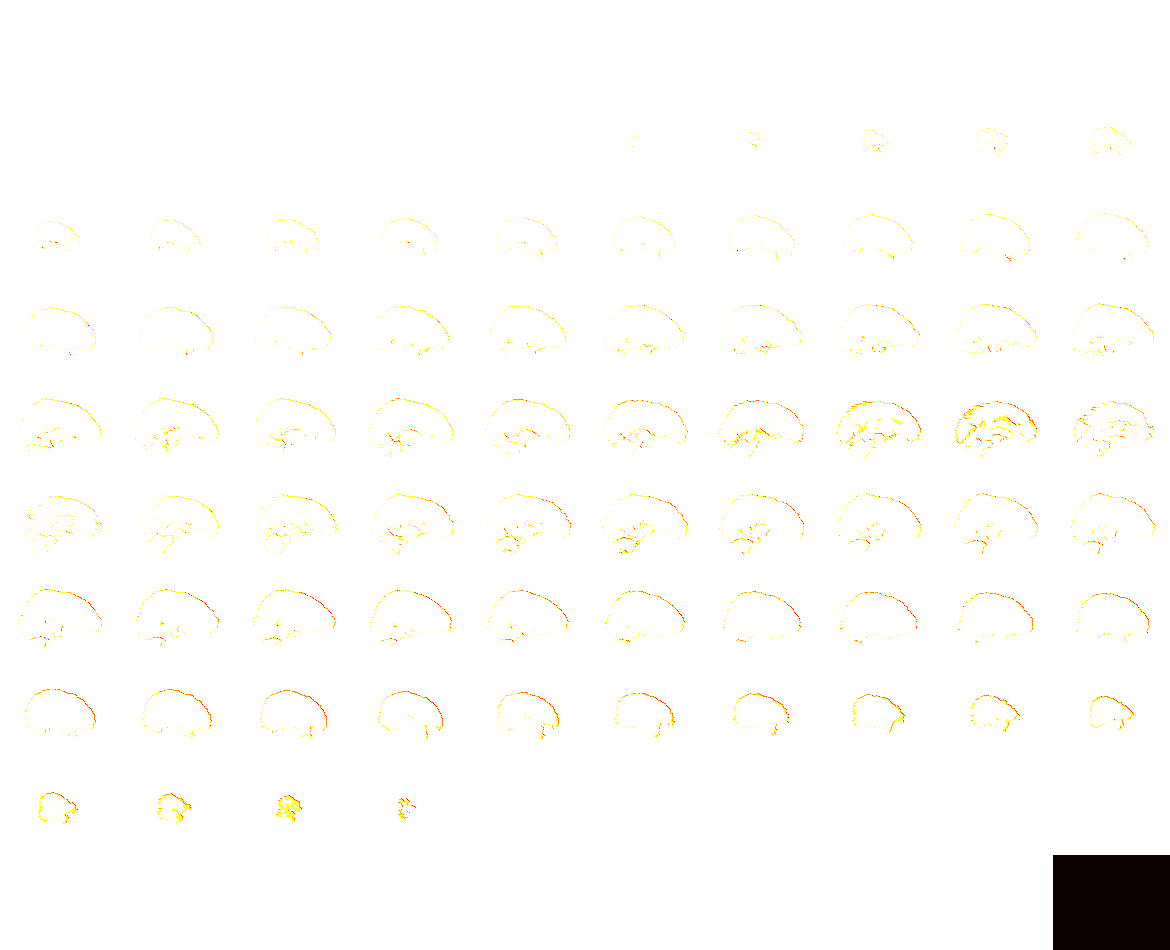

In [48]:
plotting.view_img(images['mask'])

In [49]:
group_clusters = slf.load_cluster_csv(save_results, 'group_clusters.csv')
group_clusters

No Significant Clusters


In [50]:
time_clusters = slf.load_cluster_csv(save_results, 'time_clusters.csv')
time_clusters

No Significant Clusters


In [51]:
interaction_clusters = slf.load_cluster_csv(save_results, 'interaction_clusters.csv')
interaction_clusters

,cluster_id,peak_x,peak_y,peak_z,volume_mm,log10p,pval,harvard_oxford,aal,desikan_killiany
0,1,-4.5,-56.5,-14.5,32,1.38399,0.041306,100.00% no_label,75.00% Vermis_4_5; 25.00% Cerebelum_4_5_L,100.00% Left-Cerebellum-Cortex


In [58]:
if interaction_clusters['harvard_oxford'].str.contains('no_label')[0] == True:
    print('no')

no
